[Reference](https://towardsdatascience.com/3-unique-python-packages-for-time-series-forecasting-2926a09aaf5b)

# 1. StatsForecast

In [1]:
pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 9.8 MB 10.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
from statsforecast.utils import generate_series
synthetic_panel = generate_series(n_series=1, freq = 'M')
synthetic_panel.head()

,ds,y
unique_id,,
0,2000-01-31,0.296422
0,2000-02-29,1.422133
0,2000-03-31,2.428973
0,2000-04-30,3.423626
0,2000-05-31,4.311782


In [4]:
Y_train_df = synthetic_panel[:-6]
Y_test_df = synthetic_panel[-6:]

In [5]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

In [6]:
season_length = 12

horizon = len(Y_test_df)

models = [
AutoARIMA(season_length=season_length),
ETS(season_length=season_length, model='ZMZ')
]


model = StatsForecast(
df=Y_train_df,
models=models,
freq='M',
n_jobs=-1)

In [8]:
%time
Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 25.3 µs


,unique_id,ds,AutoARIMA,ETS
0,0,2018-01-31,0.297650,0.285181
1,0,2018-02-28,1.223331,1.262057
2,0,2018-03-31,2.214119,2.241013
3,0,2018-04-30,3.361339,3.363299
4,0,2018-05-31,4.228890,4.269345


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

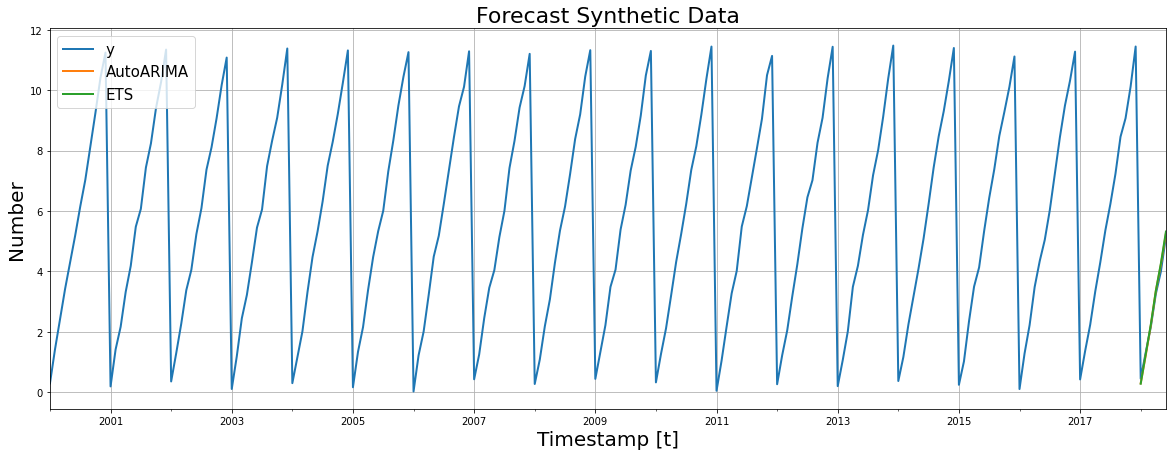

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)

ax.set_title('Forecast Synthetic Data', fontsize=22)
ax.set_ylabel('Number', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# 2. PyAF

In [11]:
pip install pyaf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 5.4 MB/s 


In [12]:
horizon = len(Y_test_df)

import pyaf.ForecastEngine as autof

#set up the model engine
lEngine = autof.cForecastEngine()

# get the best time series model for test prediction
lEngine.train(iInputDS = Y_train_df, iTime = 'ds', iSignal = 'y', iHorizon = horizon)

In [13]:
forecast_df= lEngine.forecast(Y_train_df, horizon)

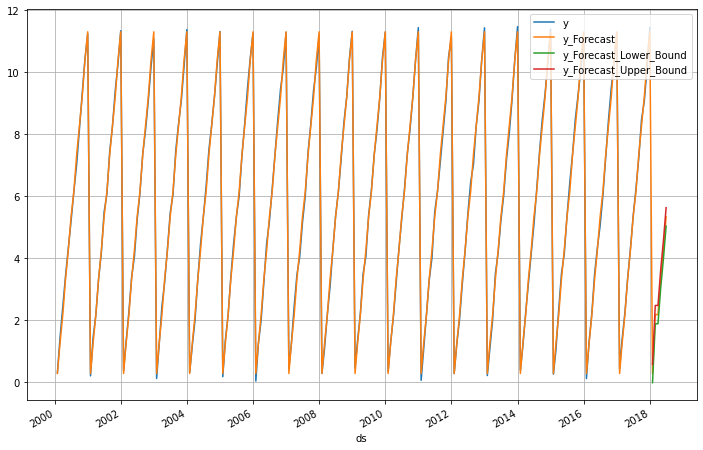

In [14]:
forecast_df.plot.line('ds', ['y' , 'y_Forecast','y_Forecast_Lower_Bound', 'y_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))

# 3. NeuralProphet

In [15]:
pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 46.9 MB/s 


In [16]:
pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
train = Y_train_df.reset_index(drop = True)
test = Y_test_df.reset_index(drop = True)

In [18]:
from neuralprophet import NeuralProphet
m = NeuralProphet()

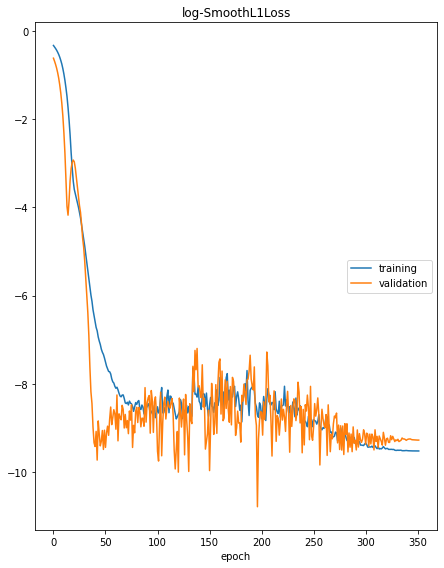

log-SmoothL1Loss
	training         	 (min:   -9.520, max:   -0.334, cur:   -9.520)
	validation       	 (min:  -10.784, max:   -0.623, cur:   -9.274)


In [19]:
metrics = m.fit(train, freq='M', validation_df=Y_test_df, progress='plot')

In [20]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
351,0.000073,0.112058,0.134827,0.0,0.000094,0.140599,0.15417


In [20]:
forecast = m.predict(train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 66.667% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 66.667% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq M. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 66.667% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 66.667% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq M. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


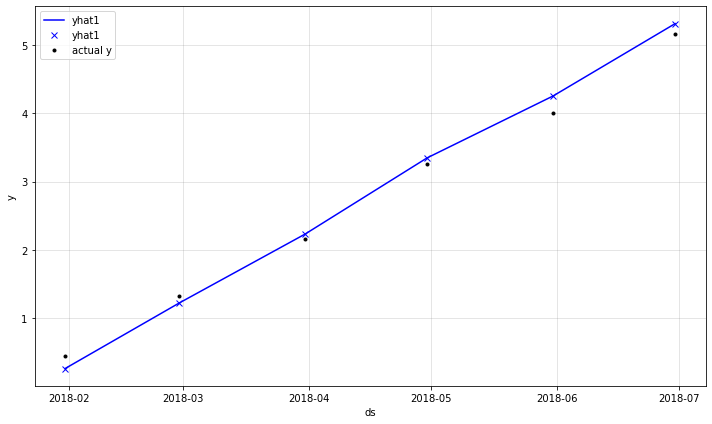

In [21]:
forecast = m.predict(test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

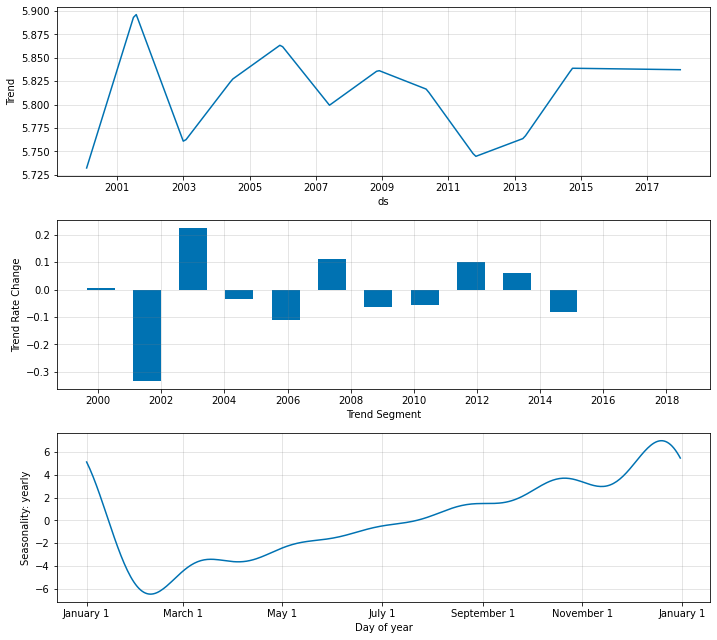

In [22]:
fig_param = m.plot_parameters()